In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf



In [3]:
start='2014-06-02'
end='2024-06-02'
stock='GOOG'
data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-06-02,27.958241,27.968212,27.211790,27.620667,27.589272,28700582
1,2014-06-03,27.474070,27.541386,27.053225,27.172398,27.141512,37332215
2,2014-06-04,27.000870,27.355396,26.863747,27.158438,27.127567,36329469
3,2014-06-05,27.245197,27.671528,27.147964,27.619171,27.587778,33782496
4,2014-06-06,27.826603,27.826603,27.371351,27.740339,27.708807,34735104
...,...,...,...,...,...,...,...
2513,2024-05-24,176.520004,177.304001,175.199997,176.330002,176.129578,11400600
2514,2024-05-28,175.740005,178.509995,175.679993,178.020004,177.817657,15655300
2515,2024-05-29,176.809998,178.229996,176.259995,177.399994,177.198349,15023800
2516,2024-05-30,176.690002,176.690002,173.229996,173.559998,173.362717,18844000


In [6]:
ma_100_days = data.Close.rolling(100).mean()

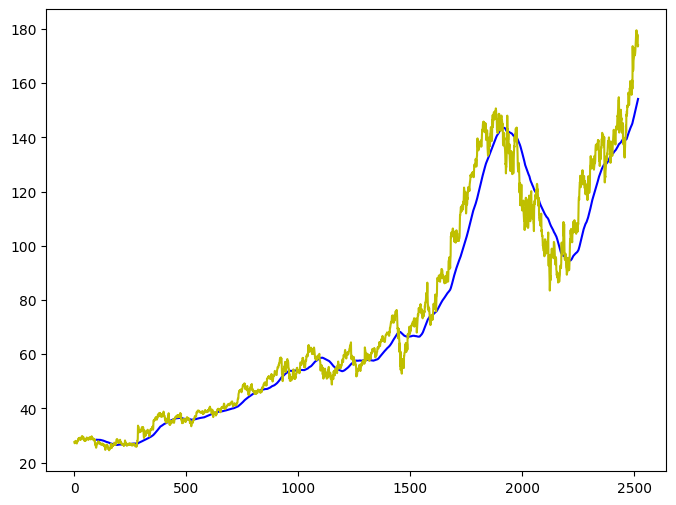

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'b')
plt.plot(data.Close,'y')
plt.show()

In [8]:
ma_200_days=data.Close.rolling(200).mean()

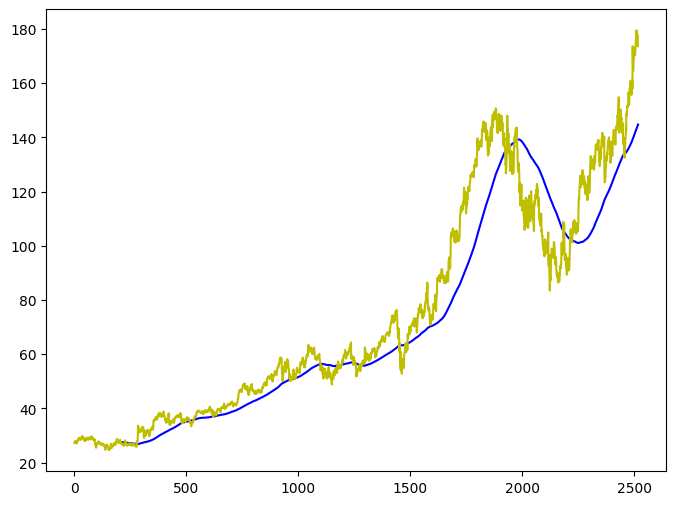

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'y')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [12]:
data_train.shape[0]

2014

In [13]:
data_test.shape[0]

504

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale=scaler.fit_transform(data_train)

In [16]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
from keras.layers import Dense,Dropout,LSTM
from keras import Sequential

In [18]:
x,y=np.array(x),np.array(y)

In [19]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [20]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - loss: 0.0751
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0087
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0072
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0068
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.0054
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 0.0048
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - loss: 0.0052
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0039
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0048
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0038
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0039
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0037
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - loss: 0.0037
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 0.0033
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - l

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
pas_100_days=data_train.tail(100)

In [25]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [26]:
data_test

,Close
0,137.653503
1,137.550995
2,137.004501
3,138.574005
4,140.017502
...,...
599,176.330002
600,178.020004
601,177.399994
602,173.559998


In [27]:
data_test_scale=scaler.fit_transform(data_test)

In [28]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [29]:
y_predict=model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step


In [30]:
y_predict

array([[0.29793516],
       [0.29231715],
       [0.2880594 ],
       [0.28532583],
       [0.28432453],
       [0.28545013],
       [0.2885269 ],
       [0.29355785],
       [0.30050868],
       [0.3081653 ],
       [0.31491524],
       [0.31917605],
       [0.31969652],
       [0.3162151 ],
       [0.31027555],
       [0.30357862],
       [0.29717827],
       [0.29186136],
       [0.28791386],
       [0.28555423],
       [0.28495526],
       [0.28602254],
       [0.28808102],
       [0.29027042],
       [0.29228348],
       [0.29426265],
       [0.29696032],
       [0.30110213],
       [0.3067549 ],
       [0.31353706],
       [0.32048035],
       [0.3263986 ],
       [0.33056557],
       [0.33233097],
       [0.33159858],
       [0.32901928],
       [0.32570568],
       [0.32149577],
       [0.31612018],
       [0.30996755],
       [0.30381238],
       [0.29827976],
       [0.294062  ],
       [0.29148751],
       [0.29085138],
       [0.2923378 ],
       [0.29594967],
       [0.302

In [31]:
scaler.scale_

array([0.01041124])

In [32]:
scale=1/scaler.scale_

In [33]:
y_predict=y_predict*scale

In [34]:
y=y*scale

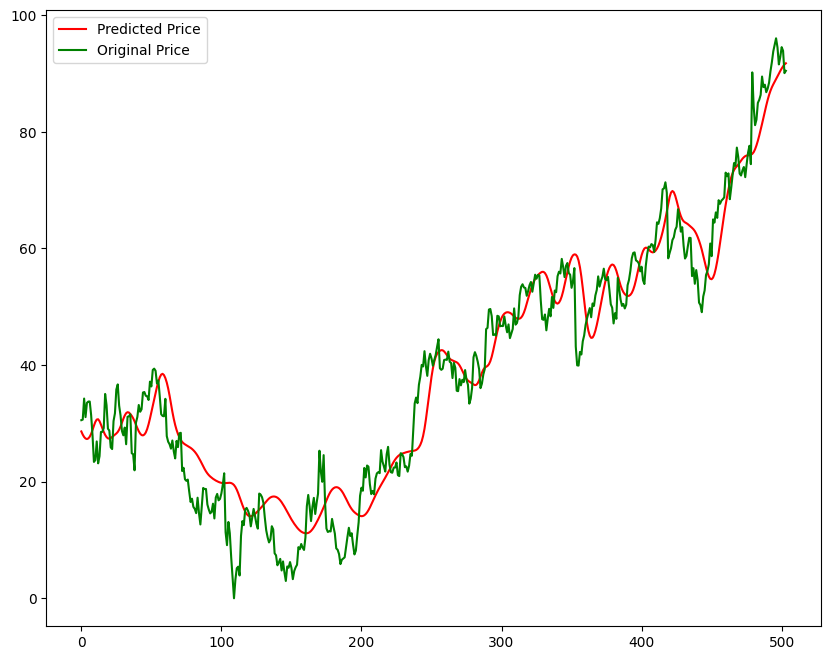

In [35]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel=('Time')
plt.ylabel=('Price')
plt.legend()
plt.show()

In [89]:
model.save('stock predictions model.keras') #1st keras file

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [37]:
x_train_rf = x.reshape((x.shape[0], x.shape[1] * x.shape[2]))
x_test_rf = x.reshape((x.shape[0], x.shape[1] * x.shape[2]))

In [38]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train_rf, y)

RandomForestRegressor()

In [39]:
y_pred_rf = rf_model.predict(x_test_rf)

In [40]:
y_pred_rf_rescaled = y_pred_rf * (1 / scaler.scale_[0])
y_test_rescaled = y * (1 / scaler.scale_[0])

In [41]:
mse_rf = mean_squared_error(y_test_rescaled, y_pred_rf_rescaled)
print(f'Random Forest Mean Squared Error: {mse_rf}')

Random Forest Mean Squared Error: 8088.16110204628


In [42]:
pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [44]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(x_train_rf, y)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [45]:
y_pred_xgb = xg_reg.predict(x_test_rf)


In [46]:
y_pred_xgb_rescaled = y_pred_xgb * (1 / scaler.scale_[0])


In [47]:
mse_xgb = mean_squared_error(y_test_rescaled, y_pred_xgb_rescaled)
print(f'XGBoost Mean Squared Error: {mse_xgb}')

XGBoost Mean Squared Error: 4957.421133887055


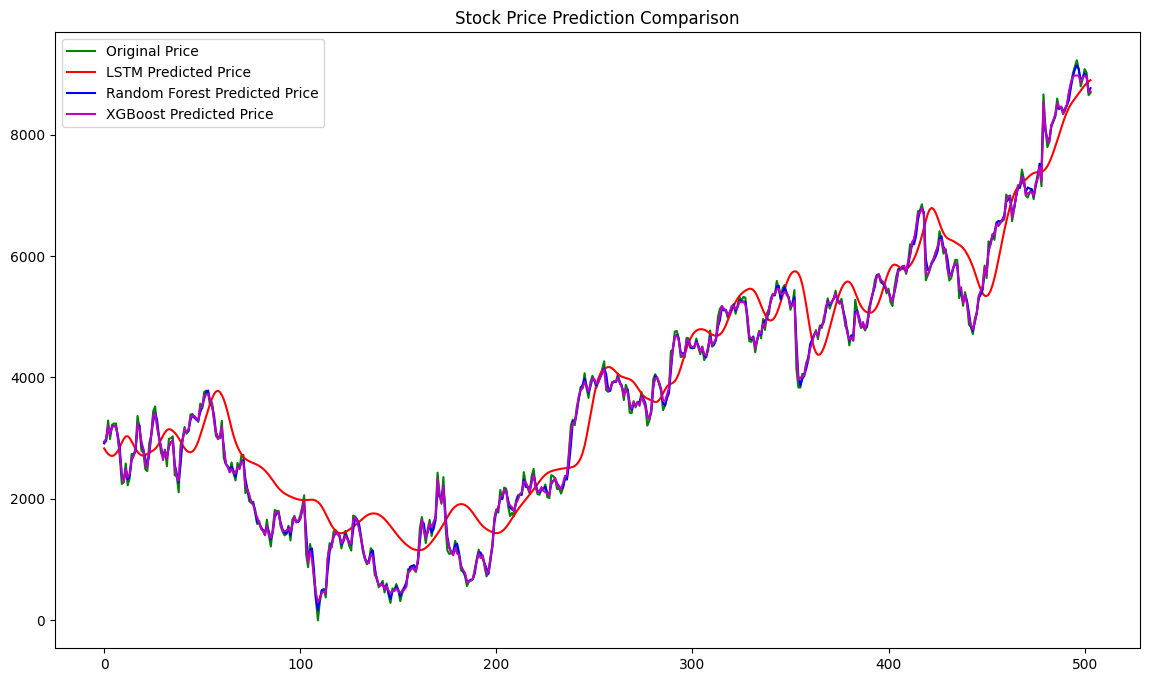

In [56]:
predict_rescaled = scaler.inverse_transform(y_predict)
plt.figure(figsize=(14, 8))

plt.plot(y_test_rescaled, 'g', label='Original Price')
plt.plot(predict_rescaled, 'r', label='LSTM Predicted Price')
plt.plot(y_pred_rf_rescaled, 'b', label='Random Forest Predicted Price')
plt.plot(y_pred_xgb_rescaled, 'm', label='XGBoost Predicted Price')

plt.xlabel=('Time')
plt.ylabel=('Price')
plt.legend()
plt.title('Stock Price Prediction Comparison')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [50]:
mse_lstm = mean_squared_error(y_test_rescaled, y_predict)
mae_lstm = mean_absolute_error(y_test_rescaled, y_predict)
r2_lstm = r2_score(y_test_rescaled, y_predict)

In [51]:
mse_rf = mean_squared_error(y_test_rescaled, y_pred_rf_rescaled)
mae_rf = mean_absolute_error(y_test_rescaled, y_pred_rf_rescaled)
r2_rf = r2_score(y_test_rescaled, y_pred_rf_rescaled)

In [52]:
mse_xgb = mean_squared_error(y_test_rescaled, y_pred_xgb_rescaled)
mae_xgb = mean_absolute_error(y_test_rescaled, y_pred_xgb_rescaled)
r2_xgb = r2_score(y_test_rescaled, y_pred_xgb_rescaled)

In [53]:
print(f'LSTM Mean Squared Error: {mse_lstm}')
print(f'LSTM Mean Absolute Error: {mae_lstm}')
print(f'LSTM R-squared: {r2_lstm}')

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest Mean Absolute Error: {mae_rf}')
print(f'Random Forest R-squared: {r2_rf}')

print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost Mean Absolute Error: {mae_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')

LSTM Mean Squared Error: 18076438.41941783
LSTM Mean Absolute Error: 3692.0984008967484
LSTM R-squared: -2.991094029028497
Random Forest Mean Squared Error: 8088.16110204628
Random Forest Mean Absolute Error: 65.62631124581564
Random Forest R-squared: 0.9982142161674105
XGBoost Mean Squared Error: 4957.421133887055
XGBoost Mean Absolute Error: 53.184658536113915
XGBoost R-squared: 0.9989054517583739


In [108]:
model.save('stock price prediction.keras')# 2nd keras file